
# Groupon Assignment

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
&nbsp;
<li><a href="#Part 1">Part 1</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#financials">Financial Analysis</a></li>
<li><a href="#recommendation">Recommendation for GRPN Stock</a></li>
<li><a href="#qual_sum">Quality Assurance Summary</a></li>
&nbsp;
<li><a href="#part2">Part 2</a></li>
<li><a href="#p2datawrang">Data Wrangling and Cleaning</a></li>
<li><a href="#dupemethod">Duplication Methodology Explained</a></li> 
<li><a href="#validdeals">Valid Deals</a></li>
<li><a href="#est_sum">Summary of Estimates</a></li>
</ul>

<a id='intro'></a>
## Introduction

The objective for this Jupyter Notebook will be broken down into two parts. I will be conducting various analyses on datasets for Groupon, and documenting steps within this notebook.

### Part 1:

For Part 1 of this assignment, I will use a dataset given to me to estimate Groupon’s 4Q13 North America gross billings by segment (Local, Goods, Travel) and make a buy or sell recommendation of GRPN stock ahead of Groupon’s 4Q13 earnings release. This dataset includes 4Q2013 North American Groupon deals, units sold, and billings associated with each specific deal for the given quarter, broken down by segment. Throughout this notebook, I will be running a series of quality assurance checks to check the integrity of our data, ensuring that we have no duplicated rows (deals), no missing data, no incorrect data types or NaN values. Explanations for quality assurance, and any adjustments will be documented within the notebook. Additionally, I will be including a detailed explanation of my methodology for dealing with the gap in data from 10/20/13 - 10/30/13 for the local segment. Once the data has been assessed, and cleaned, I will be providing a summary of my estimates for 4Q2013 gross billings by segment, performing financial analysis, and comparing my estimates to those of Wall Street equity research reports. After the summary, I will be providing my buy or sell recommendation for GRPN stock.

### Part 2:

For Part 2 of this assignment, I will develop, describe, and implement a methodology to remove duplicate deals from a dataset provided to us in order to estimate March 2015 Groupon billings in Belgium. We will be using both Python and Excel to analyze our data, and derive a methodology for removing duplicate deals from this dataset. Any work done in Excel will also be documented in this notebook.





In [1]:
# Use this cell to set up import statements for all of the packages that we will be using.
import numpy as np
import pandas as pd
from IPython.display import Image

<a id='Part 1'></a>
# Part 1

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
# load in datasets using pandas csv reader 
df_group = pd.read_csv('Q4_2013_Groupon_North_America_Data_XLSX.csv')

In [3]:
# display the first 5 lines of our dataset in order to see how the data was imported 
df_group.head()

,Deal ID,Units Sold,Billings,Start Date,Deal URL,Segment,Inventory Type,Unnamed: 7
0,gr-millevois-tire-service-center,0.0,0.0,11/21/11,http://www.groupon.com/deals/gr-millevois-tire...,Local,Third - Party,NaN
1,gr-manakeesh-cafe-bakery,0.0,0.0,11/21/11,http://www.groupon.com/deals/gr-manakeesh-cafe...,Local,Third - Party,NaN
2,gr-phoenix-salon-and-spa,0.0,0.0,11/21/11,http://www.groupon.com/deals/gr-phoenix-salon-...,Local,Third - Party,NaN
3,gr-hands-in-motion,0.0,0.0,11/21/11,http://www.groupon.com/deals/gr-hands-in-motion,Local,Third - Party,NaN
4,dc-fd2-bartending-college-allentown-reading,86.8,4253.2,6/6/12,http://www.groupon.com/deals/dc-fd2-bartending...,Local,Third - Party,NaN


I notice in looking at our dataset above, that there is an unnamed column that contains NaN values which I will need to drop later on. I can also notice that our column names contain spaces and uppercase letters, I will parse through these later on to make them more easily accesible. 

In [4]:
# check the values in each column for a certain row in our dataset to check that columns have valid data 
df_group.iloc[5000]

Deal ID                                   essential-health-center-4
Units Sold                                                        0
Billings                                                          0
Start Date                                                   1/9/13
Deal URL          http://www.groupon.com/deals/essential-health-...
Segment                                                       Local
Inventory Type                                        Third - Party
Unnamed: 7                                                      NaN
Name: 5000, dtype: object

In [5]:
# check the number of values in each column in our dataset to check for missing data and check to see that values are 
# saved in the correct datatype
df_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138534 entries, 0 to 138533
Data columns (total 8 columns):
Deal ID           138534 non-null object
Units Sold        138534 non-null float64
Billings          138534 non-null float64
Start Date        138534 non-null object
Deal URL          138534 non-null object
Segment           138534 non-null object
Inventory Type    138534 non-null object
Unnamed: 7        0 non-null float64
dtypes: float64(3), object(5)
memory usage: 8.5+ MB


In [6]:
# check to see if there are any duplicate rows in the dataset 
df_group.duplicated().sum()

0

In [7]:
# check the number of unique deal ids 
df_group[df_group.columns[0]].nunique()

138534

In [8]:
# check the number of unique deal urls 
df_group[df_group.columns[4]].nunique()

138534

In [9]:
# check the number of None or NaN value in each of the columns
df_group.isnull().sum()

Deal ID                0
Units Sold             0
Billings               0
Start Date             0
Deal URL               0
Segment                0
Inventory Type         0
Unnamed: 7        138534
dtype: int64

Taking a look at the results from the above quality assurance tests, I can see that our dataset is actually rather clean. There are no duplicated rows (deals), there is no missing data in any of our required columns considering they all contain 138534 values, and there are no NaN values that need to be removed or filled. Additionally, for the most part, each column contains the correct data type. The only columns which should contain floats are Units Sold and Billings, which they do, but I will need to convert the Start Date column from string to date time. Moving forward, the issues I will have to address are dropping the unnamed extra column, parsing through column names so they are easier to work with later on, converting start date to date time, and working through my methodology to fill the missing data from 10/20/2013 - 10/30/2013.

In the data cleaning section, I will take care of the above mentioned issues, and document my steps. 

### Data Cleaning

Starting data cleaning process for the Groupon dataframe which will include, dropping unnecessary columns, setting start_date to datetime format, parsing through column names, and applying a solution to the missing Local segment data from 10/20/2013 - 10/30/2013.

In [10]:
# drop the unnamed column from our dataframe 
df_group.drop(labels = df_group.columns[7], axis = 1, inplace = True)

In [11]:
# parse through column names removing spaces, replacing with '_', and converting everything to lower case 
df_group.columns = df_group.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [12]:
# convert start_date column from str to datetime
df_group['start_date'] = pd.to_datetime(df_group['start_date'])

In the following cells I will be addressing the missing Local segment data from 10/20/2013 - 10/30/2013. My methodology for filling this missing data will be as follows. 

> Using our existing monthly data for October 2013 (10/1-10/19), I will find the average number of new deals per day for the Local segment, once I have that figure, I can use that number to create 'place-holder rows' for each day in our missing time period. This will properly account for the number of missing new deals during that time frame. We will use a similar methodology to fill the missing units_sold and gross billings values, as those will also be filled using the mean of each respective value for the existing October 2013 data. I am electing to use the averages for new deals started in October 2013 only (10/1-10/19) because it shows a more accurate, and current depiction than if we were to use all of the existing data. For example, if we were to use all of the data including rows with start dates in 2011, 2012, or any of the other months in 2013, we will be driving down our averages due to the fact that not many deals have been open for that long. Using the existing data from October 2013 also allows me to address the seasonality of the Groupon business. For example, purchase trends are not the same from quarter to quarter due to holiday purchase trends. Additionally, our dataset does not have a full year’s worth of data for 2011, and 2012, but we do for 2013. It is also the date range most closely associated with our missing data, and more accurately represents the actions of the company during that time frame.

In [13]:
# create a seperate dataframe that holds all deals for the local segment
df_local = df_group.query("segment == 'Local'")

In [14]:
# create a dataframe that holds the number of deals associated with every unique startdate for the local segment in 2013
df_local_2013 = df_local.query("start_date >= '2013-01-01'")

In [15]:
# create a dataframe that holds the number of deals associated with every unique startdate between 10/1/13 & 10/19/13
df_local_2013_oct = df_local.query("start_date >= '2013-10-01' & start_date <= '2013-10-19' ")

In [16]:
# find the number of average new deals started per day in the local segment for Octbober 2013
avg_deals_day_oct = round(df_local_2013_oct.groupby('start_date').count().deal_id.mean())

In [17]:
print ('The average number of new deals started per day in october is:',avg_deals_day_oct, 'deals')

The average number of new deals started per day in october is: 562 deals


Now I know that the average number of new deals per day in October 2013 for the local segment is 562. With this, I know that for our missing time period, I need to add 562 rows for each day, representing all the missing new deals. The missing new deals will each have a value for gross billings equal to the average gross billings for the time period 10/1/13-10/1/2013, and units sold will be equal to the average units sold per day for that same time period. 

In [18]:
# calculate the average billings for our local segment per start day in October 2013
mean_bill_oct_13 = df_local_2013_oct.billings.mean()

In [19]:
# calculate the average number of units sold for our local segment per start day October in 2013
mean_unit_oct_13 = df_local_2013_oct.units_sold.mean()

In calculating the mean number of units sold, and the mean billings for the local segment per new start day, we can now use these averages to fill in the data for the missing time period. What we will wind up doing is that for every day in the time period 10/20/2013 - 10/30/2013 we will add 562 rows representing the number of deals that started on that day. We will fill the units_sold and billings columns using the averages per start day. This provides us with an estimation on the value of total gross billings during that time period which was not captured.

In [20]:
# create an empty dataframe with the same column names as the main dataset to use as a holder for the holder rows we will
# create. We will then appened this dataframe to the local segment dataframe to account for the missing data 
df_holders = pd.DataFrame(columns= df_local.columns)

# iterate through 325 times each day in our missing time period, creating a place holder row which contains the mean_units sold and the mean_billings 
for i in range(avg_deals_day_oct):
    df_holders = df_holders.append(pd.Series(['deal_id_place_holder_1020' + str(i) , mean_unit_oct_13, mean_bill_oct_13, '10/20/13', 'deal_url_place_holder-1020' + str(i) , 'Local', 'Third - Party' ], index= df_local.columns), ignore_index=True)
    df_holders = df_holders.append(pd.Series(['deal_id_place_holder_1021' + str(i) , mean_unit_oct_13, mean_bill_oct_13, '10/21/13', 'deal_url_place_holder-1021' + str(i) , 'Local', 'Third - Party' ], index= df_local.columns), ignore_index=True)
    df_holders = df_holders.append(pd.Series(['deal_id_place_holder_1022' + str(i) , mean_unit_oct_13, mean_bill_oct_13, '10/22/13', 'deal_url_place_holder-1022' + str(i) , 'Local', 'Third - Party' ], index= df_local.columns), ignore_index=True)
    df_holders = df_holders.append(pd.Series(['deal_id_place_holder_1023' + str(i) , mean_unit_oct_13, mean_bill_oct_13, '10/23/13', 'deal_url_place_holder-1023' + str(i) , 'Local', 'Third - Party' ], index= df_local.columns), ignore_index=True)
    df_holders = df_holders.append(pd.Series(['deal_id_place_holder_1024' + str(i) , mean_unit_oct_13, mean_bill_oct_13, '10/24/13', 'deal_url_place_holder-1024' + str(i) , 'Local', 'Third - Party' ], index= df_local.columns), ignore_index=True)
    df_holders = df_holders.append(pd.Series(['deal_id_place_holder_1025' + str(i) , mean_unit_oct_13, mean_bill_oct_13, '10/25/13', 'deal_url_place_holder-1025' + str(i) , 'Local', 'Third - Party' ], index= df_local.columns), ignore_index=True)
    df_holders = df_holders.append(pd.Series(['deal_id_place_holder_1026' + str(i) , mean_unit_oct_13, mean_bill_oct_13, '10/26/13', 'deal_url_place_holder-1026' + str(i) , 'Local', 'Third - Party' ], index= df_local.columns), ignore_index=True)
    df_holders = df_holders.append(pd.Series(['deal_id_place_holder_1027' + str(i) , mean_unit_oct_13, mean_bill_oct_13, '10/27/13', 'deal_url_place_holder-1027' + str(i) , 'Local', 'Third - Party' ], index= df_local.columns), ignore_index=True)
    df_holders = df_holders.append(pd.Series(['deal_id_place_holder_1028' + str(i) , mean_unit_oct_13, mean_bill_oct_13, '10/28/13', 'deal_url_place_holder-1028' + str(i) , 'Local', 'Third - Party' ], index= df_local.columns), ignore_index=True)
    df_holders = df_holders.append(pd.Series(['deal_id_place_holder_1029' + str(i) , mean_unit_oct_13, mean_bill_oct_13, '10/29/13', 'deal_url_place_holder-1029' + str(i) , 'Local', 'Third - Party' ], index= df_local.columns), ignore_index=True)
    df_holders = df_holders.append(pd.Series(['deal_id_place_holder_1030' + str(i) , mean_unit_oct_13, mean_bill_oct_13, '10/30/13', 'deal_url_place_holder-1030' + str(i) , 'Local', 'Third - Party' ], index= df_local.columns), ignore_index=True)


In [21]:
# convert start_date column from str to datetime
df_holders['start_date'] = pd.to_datetime(df_holders['start_date'])

In [22]:
# display a snapshot of our dataframe which holds our placeholder rows to be appeneded to both the local and master 
# dataframes
df_holders.head(11)

,deal_id,units_sold,billings,start_date,deal_url,segment,inventory_type
0,deal_id_place_holder_10200,203.433896,5438.552352,2013-10-20,deal_url_place_holder-10200,Local,Third - Party
1,deal_id_place_holder_10210,203.433896,5438.552352,2013-10-21,deal_url_place_holder-10210,Local,Third - Party
2,deal_id_place_holder_10220,203.433896,5438.552352,2013-10-22,deal_url_place_holder-10220,Local,Third - Party
3,deal_id_place_holder_10230,203.433896,5438.552352,2013-10-23,deal_url_place_holder-10230,Local,Third - Party
4,deal_id_place_holder_10240,203.433896,5438.552352,2013-10-24,deal_url_place_holder-10240,Local,Third - Party
5,deal_id_place_holder_10250,203.433896,5438.552352,2013-10-25,deal_url_place_holder-10250,Local,Third - Party
6,deal_id_place_holder_10260,203.433896,5438.552352,2013-10-26,deal_url_place_holder-10260,Local,Third - Party
7,deal_id_place_holder_10270,203.433896,5438.552352,2013-10-27,deal_url_place_holder-10270,Local,Third - Party
8,deal_id_place_holder_10280,203.433896,5438.552352,2013-10-28,deal_url_place_holder-10280,Local,Third - Party
9,deal_id_place_holder_10290,203.433896,5438.552352,2013-10-29,deal_url_place_holder-10290,Local,Third - Party


In [23]:
# display the shape of our holders datadrame
df_holders.shape

(6182, 7)

As we can see above, the holders_dataframe contains 526 rows (a total of 6182 rows added) for each missing day in our time period. Through this method we can now account for the break in the system that caused the missing data from 10/20 - 10/30. We can now find a more accurate estimate of units_sold, bilings, as well as number of new deals for 4Q2013. 

In [24]:
# create a new dataframe for the local segment which merges the existing local segment data with our place_holders 
df_loc_filled = pd.concat([df_local,df_holders])

In [25]:
# create a seperate dataframe that holds all deals for the goods segment
df_goods = df_group.query("segment == 'Goods'")

In [26]:
# create a seperate dataframe that holds all deals for the travel segment
df_travel = df_group.query("segment == 'Travel'")

<a id='eda'></a>
## Exploratory Data Analysis

> Now that I have trimmed and cleaned our data, we are ready to move on to exploration, calculations, and analysis. 

In [27]:
# sum of total billings for the local segment
print ('The sum of total gross billings for the local segment in 4Q2013 is: $', df_loc_filled.billings.sum())
# sum of total billings for the goods segment
print ('The sum of total gross billings for the goods segment in 4Q2013 is: $', df_goods.billings.sum())
# sum of total billings for the travel segment
print ('The sum of total gross billings for the travel segment in 4Q2013 is: $', df_travel.billings.sum())
# sum of total gross billings
print ('The sum of total gross billings for North America in 4Q2013 is: $', df_loc_filled.billings.sum() + df_travel.billings.sum() + df_goods.billings.sum())

The sum of total gross billings for the local segment in 4Q2013 is: $ 442843788.622
The sum of total gross billings for the goods segment in 4Q2013 is: $ 282245671.041
The sum of total gross billings for the travel segment in 4Q2013 is: $ 70552062.1245
The sum of total gross billings for North America in 4Q2013 is: $ 795641521.787


In [28]:
# sum of total units sold for the local segment
print ('The sum of total units sold for the local segment in 4Q2013 is:', df_loc_filled.units_sold.sum(), 'units')
# sum of total units sold for the goods segment
print ('The sum of total units sold for the goods segment in 4Q2013 is:', df_goods.units_sold.sum(), 'units')
# sum of total units sold for the travel segment
print ('The sum of total units sold for the travel segment in 4Q2013 is:', df_travel.units_sold.sum(), 'units')

The sum of total units sold for the local segment in 4Q2013 is: 15182108.5994 units
The sum of total units sold for the goods segment in 4Q2013 is: 10419746.304 units
The sum of total units sold for the travel segment in 4Q2013 is: 378910.2 units


In [29]:
# create a mask variable to set the time period of 4Q2013 in order to find the number of new deals started during the 
# quarter for the local segment
mask = (df_loc_filled['start_date'] >= '2013-10-1') & (df_loc_filled['start_date'] <= '2013-12-31')

# create a mask variable to set the time period of 4Q2013 in order to find the number of new deals started during the 
# quarter for the goods segment
mask_2 = (df_goods['start_date'] >= '2013-10-1') & (df_goods['start_date'] <= '2013-12-31')

# create a mask variable to set the time period of 4Q2013 in order to find the number of new deals started during the 
# quarter for the travel segment
mask_3 = (df_travel['start_date'] >= '2013-10-1') & (df_travel['start_date'] <= '2013-12-31')

In [30]:
# find the number of new deals started for 4Q2013 for the local segment
print ('The number of new deals started in 4Q2013 for the local segment is:', df_loc_filled.loc[mask].deal_id.count(), 'deals')
# find the number of new deals started for 4Q2013 for the goods segment
print ('The number of new deals started in 4Q2013 for the goods segment is:', df_goods.loc[mask_2].deal_id.count(), 'deals')
# find the number of new deals started for 4Q2013 for the travel segment
print ('The number of new deals started in 4Q2013 for the travel segment is:', df_travel.loc[mask_3].deal_id.count(),'deals')

The number of new deals started in 4Q2013 for the local segment is: 53162 deals
The number of new deals started in 4Q2013 for the goods segment is: 12749 deals
The number of new deals started in 4Q2013 for the travel segment is: 2177 deals


<a id='financials'></a>
## Financial Analysis

Now that estimates for gross billings, and units sold by segment have been calculated, I will move forward by adding to the historical financial data provided, and add a column for 4Q2013 Estimates. In adding this column to the excel file, I will use these estimates to calculate Gross Billings QoQ growth, and YoY growth. I will then compare these growth figures, along with estimates for total gross billings, to Wall Street consensus. Below I will be providing a series of images taken from the supplementary excel file. Adding these images will allow me to visualize/summarize my estimated figures, analyze growth statistics, and compare them to that of the Wall Street equity reports.

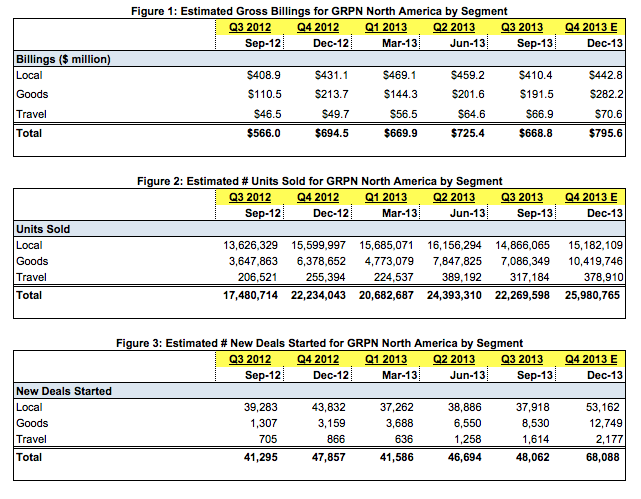

In [31]:
Image(filename='figure1.png')

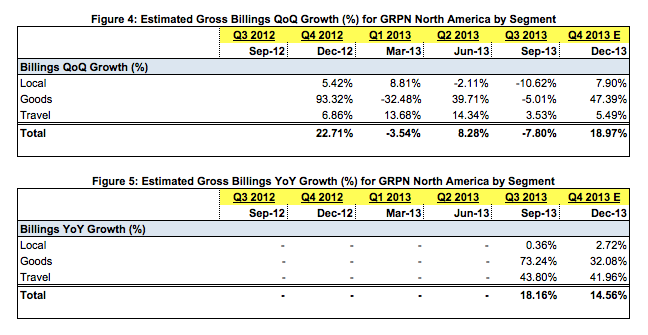

In [32]:
Image(filename='figure 2.png')

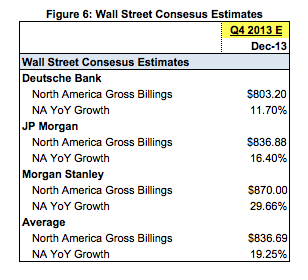

In [33]:
Image(filename='figure 3.png')

<a id='recommendation'></a>
### GRPN Stock Recommendation: Sell


Upon completing this exercise, calculating my own estimates for 4Q2013 North America Gross Billings by Segment, computing growth metrics, and comparing estimates to those of Wall Street equity reports, I would recommend a sell for GRPN stock ahead of their February earnings release. Estimates for gross billings by segment are shown in Figure 1, using the data provided, I found estimates to be 442.8, 282.2, and 70.6 Million USD for the Local, Goods, and Travel segments respectively. This provides an estimate of 795.6 Million USD for total North America Gross Billings. These estimates provide me with growth statistics of 18.97% Quarter-over-Quarter (3Q2013 to 4Q2012), and 14.56% Year-Over-Year (4Q2012 to 4Q2013) for North America Gross Billings. In analyzing these growth statistics, I noted decelerating growth rate figures in all segments QoQ, and in all segments YoY except for the Local Segment. Total QoQ, and YoY growth rate figures are both decelerating. 

In comparing estimates to those of Wall Street consensus, it is clear to see that the estimates calculated using the dataset provided are well below that of consensus estimates. Deutsche Bank provided estimates that were closest to the figures I calculated, ~7.5 Million USD higher than my estimates for total gross billings, but even then, at ~7.5 Million USD less than DB, my estimates are still barely near the bottom rung of consensus estimates. GRPN stock would not be rewarded on their earnings release for simply meeting the lowest tier of consensus estimates. On the higher end, if GRPN reported the figures calculated, they would miss Morgan Stanley estimates by almost 75 million USD for Total North America Gross Billings, and would report YoY growth figures that are ~15% lower than MS estimates. Although we have no way to confirm the accuracy of Wall Street Estimates, it is likely that they do not have the granularity of our estimates due to the access we have to direct GRPN web data. This leads me to believe that our estimates are even more accurate than those of Wall Street consensus. An earnings miss of this magnitude, falling more than 40 Million USD short of average consensus estimates for top line growth, and over 4.5% short on YoY growth would likely lead to a drop in GRPN stock price on their earnings release. 

Based primarily off of decelerating growth statistics for top line growth, and estimates for total gross billings/YoY Growth falling well below that of consensus estimates, I stand by my recommendation to sell GRPN stock ahead of their earnings release in February.
 

<a id='qual_sum'></a>
### Quality Assurance Summary 

Although the quality assurance checks are documented throughout this notebook, a summary of these checks are provided below. 
-  Checked that were no duplicate rows in our dataset, no duplicate deal_ids, and no duplicate deal_urls.
-  Fixed any data that had an incorrect datatype such as observation time.
-  Ensured that there was no missing data, and no NaN values.
-  Applied methodology to fill in missing data from 10/20/2013 - 10/30/2013 using averages for # new deals started, mean_gross_billings, and mean_units_sold.

<a id='part2'></a>
# Part 2

Prior to importing this dataset into Python, I sorted the dataset in Excel using the built in sort function on the Deal URL column. 

<a id='p2datawrang'></a>
### Data Wrangling & Cleaning

In [34]:
# import Belgium deals file into pandas dataframe
df_belg = pd.read_csv('Mar-15_groupon.be_Deals.csv')

In [35]:
# display a snapshot of our dataframe to see how data has been imported
df_belg.head()

,Deal URL,Quantity Sold,Price,Observation Time
0,http://www.groupon.be/deals/antwerpen_fr/abric...,13,EUR 99,3/30/15 5:14
1,http://www.groupon.be/deals/antwerpen_fr/aesth...,12,EUR 120,3/31/15 2:32
2,http://www.groupon.be/deals/antwerpen_fr/aesth...,12,EUR 120,3/31/15 2:32
3,http://www.groupon.be/deals/antwerpen_fr/ali-b...,1,EUR 50,3/31/15 10:22
4,http://www.groupon.be/deals/antwerpen_fr/ali-b...,6,EUR 30,3/31/15 10:22


In [36]:
# see the shape of our dataset 
df_belg.shape

(74491, 4)

In [37]:
# display info on datatypes and number of values in each column 
df_belg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74491 entries, 0 to 74490
Data columns (total 4 columns):
Deal URL            74491 non-null object
Quantity Sold       74491 non-null int64
Price               74491 non-null object
Observation Time    74491 non-null object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


From this information above we can note that there are no missing values in any columns for our dataset. I also notice that Price and Observation time are currently set as datatype object, I will want to convert price to int and oberervation time to datetime format. 

In [38]:
# display the number of unique values in each column of our dataset 
df_belg.nunique()

Deal URL            74491
Quantity Sold         550
Price                 430
Observation Time     2817
dtype: int64

Considering that I will need to use patterns in all columns to determine which rows are duplicates, I can see that are quite a few rows that have the same values in quantity_sold, price, and observation_time. This leads me to believe that identical values in those columns will be part of the methodolgy in finding our duplicates. 

In [39]:
# parse through column names removing spaces and replacing with '_' and converting everything to lower case 
df_belg.columns = df_belg.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [40]:
# remove EUR from price column
df_belg['price'] = df_belg['price'].map(lambda x: x.lstrip('EUR'))

In [41]:
# convert price from datatype str to int
df_belg['price'] = pd.to_numeric(df_belg['price'], errors='coerce').fillna(0).astype(np.int64)

In [42]:
# convert observation time from string to datetime format
df_belg['observation_time'] = pd.to_datetime(df_belg['observation_time'])

<a id='dupemethod'></a>
### Duplication Methodology Explained

My methodology for finding duplicates in this dataset will be as follows:
-  Each URL is structured in a similar way. All of them begin with http://www.groupon.be/deals/, followed by location, the product, and then what seems to be a unique URL identifier. Rows that are duplicates will have the same URL up until the unique identifier. 
-  In order to find these URL's that match, I will search through the deal_urls, identifying those with matching information between http://www.groupon.be/deals/ and the unique identifier. In order to identify these, I will be parsing through the deal urls and extracting the string of text between the 4th and 6th '/'.
- In addition to this, the rows must have the same number of units sold, price, and observation time in order to be considered a complete duplicate. This must also be true because there are deals for the same product that has a different price and different number of units sold associated with it. 
-  An example of two rows that are duplicates will be provided in a few cells below.

In [43]:
# create a column in our dataframe that holds a list of strings split by '/' for each deal url
df_belg['url_split'] = df_belg['deal_url'].str.split('/')

In [44]:
# initialize an empty list that will hold all of the location_product_ids
loc_prod_list = []

# iterate through each row of our url_split column and take the 4 and 5 indexes concatenated and append loc_prod_list
# this takes the specific location/deal_id from each url 
for row in df_belg['url_split']:
    loc_prod_list.append(row[4]+row[5])

In [45]:
# create a column for location_product_ids in our dataframe
df_belg['loc_prod_id'] = loc_prod_list

In [46]:
# display a snapshot of our dataframe after some adjustments 
df_belg.head()

,deal_url,quantity_sold,price,observation_time,url_split,loc_prod_id
0,http://www.groupon.be/deals/antwerpen_fr/abric...,13,99,2015-03-30 05:14:00,"[http:, , www.groupon.be, deals, antwerpen_fr,...",antwerpen_frabricot
1,http://www.groupon.be/deals/antwerpen_fr/aesth...,12,120,2015-03-31 02:32:00,"[http:, , www.groupon.be, deals, antwerpen_fr,...",antwerpen_fraesthetics-beauty-clinics-2
2,http://www.groupon.be/deals/antwerpen_fr/aesth...,12,120,2015-03-31 02:32:00,"[http:, , www.groupon.be, deals, antwerpen_fr,...",antwerpen_fraesthetics-beauty-clinics-2
3,http://www.groupon.be/deals/antwerpen_fr/ali-b...,1,50,2015-03-31 10:22:00,"[http:, , www.groupon.be, deals, antwerpen_fr,...",antwerpen_frali-baba-antwerpen
4,http://www.groupon.be/deals/antwerpen_fr/ali-b...,6,30,2015-03-31 10:22:00,"[http:, , www.groupon.be, deals, antwerpen_fr,...",antwerpen_frali-baba-antwerpen


The below rows show an example of two rows in our dataset which are duplicates. They follow the methodology detaied above in that quantity sold, price, observation time, and location_product_id extracted from the deal url are all identical. In the cells below, we will use a built in Python method to remove these duplicated rows based off of a subset of column values in each row 

In [48]:
df_belg.iloc[1:3]

,deal_url,quantity_sold,price,observation_time,url_split,loc_prod_id
1,http://www.groupon.be/deals/antwerpen_fr/aesth...,12,120,2015-03-31 02:32:00,"[http:, , www.groupon.be, deals, antwerpen_fr,...",antwerpen_fraesthetics-beauty-clinics-2
2,http://www.groupon.be/deals/antwerpen_fr/aesth...,12,120,2015-03-31 02:32:00,"[http:, , www.groupon.be, deals, antwerpen_fr,...",antwerpen_fraesthetics-beauty-clinics-2


<a id='validdeals'></a>
### Valid Deals

In [49]:
# create a dataframe subset from our main dataframe dropping all of the duplicates using our methodology above 
# we will keep one (valid deal) as well as all deals that are not duplicated 
valid_deals = df_belg.drop_duplicates(subset=['quanity_sold', 'price', 'observation_time', 'loc_prod_id'], keep= 'first')

In [50]:
# create a gross billings column by multipying price by quantity sold for each of our valid deals
valid_deals['gross_billings'] = valid_deals['quantity_sold'] * valid_deals['price']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
valid_deals.head()

,deal_url,quantity_sold,price,observation_time,url_split,loc_prod_id,gross_billings
0,http://www.groupon.be/deals/antwerpen_fr/abric...,13,99,2015-03-30 05:14:00,"[http:, , www.groupon.be, deals, antwerpen_fr,...",antwerpen_frabricot,1287
1,http://www.groupon.be/deals/antwerpen_fr/aesth...,12,120,2015-03-31 02:32:00,"[http:, , www.groupon.be, deals, antwerpen_fr,...",antwerpen_fraesthetics-beauty-clinics-2,1440
3,http://www.groupon.be/deals/antwerpen_fr/ali-b...,1,50,2015-03-31 10:22:00,"[http:, , www.groupon.be, deals, antwerpen_fr,...",antwerpen_frali-baba-antwerpen,50
4,http://www.groupon.be/deals/antwerpen_fr/ali-b...,6,30,2015-03-31 10:22:00,"[http:, , www.groupon.be, deals, antwerpen_fr,...",antwerpen_frali-baba-antwerpen,180
6,http://www.groupon.be/deals/antwerpen_fr/antwe...,0,0,2015-03-30 12:45:00,"[http:, , www.groupon.be, deals, antwerpen_fr,...",antwerpen_frantwerp-bowling-1,0


In [52]:
valid_deals.shape

(44451, 7)

<a id='est_sum'></a>
### Estimate Summary

In [53]:
print ('30040 duplicate rows were removed from our orignal dataset.')

30040 duplicate rows were removed from our orignal dataset.


In [54]:
# calculate estimate for Belgium March 2015 Gross Billings 
print('Estimate for Belgium March 2015 Gross Billings is:', valid_deals.gross_billings.sum(),'EUR')

Estimate for Belgium March 2015 Gross Billings is: 138046133 EUR


In [55]:
# save our valid deals dataframe 
valid_deals.to_csv('valid_deals.csv')